## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Step 1: Data Preprocessing

### Read & Explore The Data

In [2]:
df = pd.read_csv('final_data.csv')
df.head(5)

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


### Data Type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

## Check Null

In [4]:
df.isnull().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

### Check Not Available

In [5]:
df.isna().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

### Dropping Not Available values

In [6]:
# df.dropna(inplace=True)
df.fillna(df.select_dtypes(include='number').median(),inplace=True)

### Check the dublicate data

In [7]:
print(f'Number of Dublicated data = {df.duplicated().sum()}')

Number of Dublicated data = 0


### Dropping Dublicates

In [8]:
#df.drop_duplicates(inplace=True)

### Check if there is a leading or trailing white spaces

In [9]:
def has_whitespace(x):
    return isinstance(x, str) and (x != x.strip())

whitespace_check = df.applymap(has_whitespace)
print(whitespace_check.sum())

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             0
ewr_dist             0
lga_dist             0
sol_dist             0
nyc_dist             0
distance             0
bearing              0
dtype: int64


### Cleaning White Spaces

In [10]:
# remove_spaces = lambda x: x.strip() if isinstance(x, str) else x
# df = df.apply(remove_spaces)

### Dropping columns

In [11]:
df.drop(columns=['User ID','User Name','Driver Name','key','pickup_datetime','day','month'],inplace=True)

### Descriptive Statistics

In [12]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,11.358361,-1.265712,0.696740,-1.265756,0.696675,1.683428,13.510834,3.042008,2011.739132,385.275940,380.500200,363.840330,363.670585,355.987968,19.468602,0.297141
std,9.916617,0.206941,0.140909,0.205902,0.128997,1.307395,6.511571,1.949240,1.860889,2419.075630,2428.792842,2425.064022,2428.336786,2428.718941,367.297769,1.804540
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,1.000000,2010.000000,41.341545,32.173718,17.100776,14.887002,7.147434,1.214561,-0.854710
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,5.000000,2013.000000,43.785642,38.304440,22.214777,22.417794,14.448641,3.890026,2.206761
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


In [13]:
df.head()

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,Very Good,windy,Congested Traffic,4.5,-1.288826,0.710721,-1.288779,0.710563,1,17,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,Excellent,cloudy,Flow Traffic,16.9,-1.291824,0.710546,-1.291182,0.711780,1,16,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,Bad,stormy,Congested Traffic,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,Very Good,stormy,Flow Traffic,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,Bad,stormy,Congested Traffic,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


### Checking And Handling Outliers

- Calculate IQR range 
- Calculate lower and upper bounds that can be Considered
    - usually `1.5 * IQR` would be a good choice
        

In [14]:
def get_outliers(data):
    temp = data.select_dtypes(include='number')
    Q1 = temp.quantile(0.25)
    Q3 = temp.quantile(0.75)
    iqr = Q3 - Q1
    lower_bound = Q1 - 1.5 * iqr
    upper_bound = Q3 + 1.5 * iqr
    outliers = (temp < lower_bound) | (temp > upper_bound)
    return iqr, lower_bound, upper_bound, outliers

In [15]:
iqr, lower_bound, upper_bound, outliers = get_outliers(df)
iqr

fare_amount           6.500000
pickup_longitude      0.000435
pickup_latitude       0.000561
dropoff_longitude     0.000485
dropoff_latitude      0.000595
passenger_count       1.000000
hour                 10.000000
weekday               4.000000
year                  3.000000
jfk_dist              2.444097
ewr_dist              6.130722
lga_dist              5.114001
sol_dist              7.530792
nyc_dist              7.301208
distance              2.675465
bearing               3.061471
dtype: float64

### Outliers Before handling

In [16]:
outliers.sum()

fare_amount          43331
pickup_longitude     33966
pickup_latitude      23703
dropoff_longitude    35805
dropoff_latitude     30749
passenger_count      56526
hour                     0
weekday                  0
year                     0
jfk_dist             59287
ewr_dist             28380
lga_dist             22539
sol_dist             18610
nyc_dist             21940
distance             41927
bearing                  0
dtype: int64

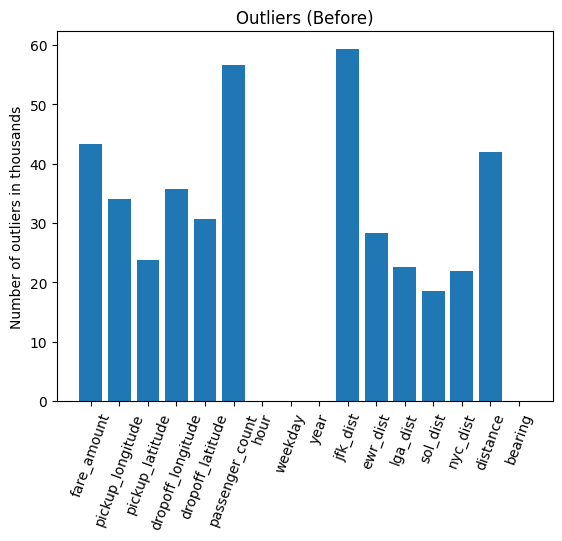

In [17]:
plt.bar(df.select_dtypes(include='number').columns,np.array(outliers.sum())/1000)
plt.xticks(rotation=70)
plt.ylabel('Number of outliers in thousands')
plt.title('Outliers (Before)')
plt.savefig('outliers_1.png')
plt.show()

### Dropping the outliers of `fare_amount` feature as it the most important feature

In [18]:
temp = df[(df['fare_amount']<=upper_bound['fare_amount']) & (df['fare_amount']>=lower_bound['fare_amount'])]
temp.shape

(456669, 19)

### Effect of Outliers after handling fare_amount outliers

- The number of outliers of `fare_amount` is dropped by `66.6%`
- The number of outliers of `pickup_longitude` is dropped by `48.7%`
- The number of outliers of `pickup_latitude` is dropped by `30.4%`
- The number of outliers of `dropoff_longitude` is dropped by `42.6%`
- The number of outliers of `dropoff_latitude` is dropped by `32.5%`
- The number of outliers of `passenger_count` is dropped by `9.1%`
- The number of outliers of `jfk_dist` is dropped by `32.6%`
- The number of outliers of `ewr_dist` is dropped by `43.1%`
- The number of outliers of `lga_dist` is dropped by `31.0%`
- The number of outliers of `sol_dist` is dropped by `24.4%`
- The number of outliers of `nyc_dist` is dropped by `32.5%`
- The number of outliers of `distance` is dropped by `51.4%`

In [19]:
iqr2, lower_bound2, upper_bound2, outliers2 = get_outliers(temp)
iqr

fare_amount           6.500000
pickup_longitude      0.000435
pickup_latitude       0.000561
dropoff_longitude     0.000485
dropoff_latitude      0.000595
passenger_count       1.000000
hour                 10.000000
weekday               4.000000
year                  3.000000
jfk_dist              2.444097
ewr_dist              6.130722
lga_dist              5.114001
sol_dist              7.530792
nyc_dist              7.301208
distance              2.675465
bearing               3.061471
dtype: float64

In [20]:
outliers2.sum()

fare_amount          14462
pickup_longitude     17440
pickup_latitude      16506
dropoff_longitude    20566
dropoff_latitude     20765
passenger_count      51399
hour                     0
weekday                  0
year                     0
jfk_dist             39948
ewr_dist             16148
lga_dist             15561
sol_dist             14070
nyc_dist             14802
distance             20365
bearing                  0
dtype: int64

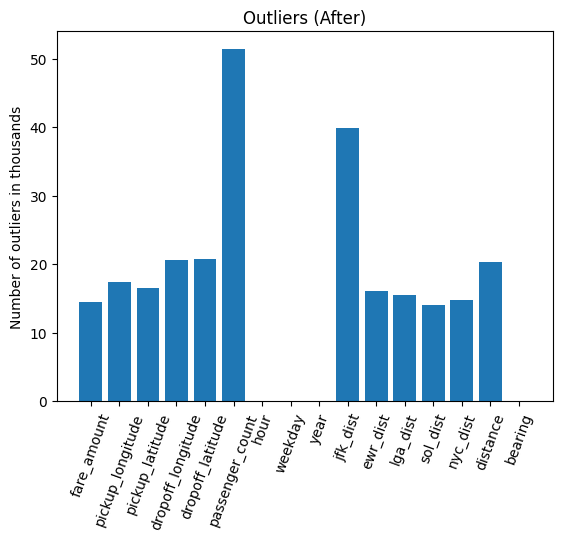

In [21]:
plt.bar(temp.select_dtypes(include='number').columns,np.array(outliers2.sum())/1000)
plt.xticks(rotation=70)
plt.ylabel('Number of outliers in thousands')
plt.title('Outliers (After)')
plt.savefig('outliers_2.png')
plt.show()

In [22]:
epsilon = 1e-10
res = (outliers.sum() - outliers2.sum())*100 / (outliers.sum() + epsilon)
res

fare_amount          66.624357
pickup_longitude     48.654537
pickup_latitude      30.363245
dropoff_longitude    42.561095
dropoff_latitude     32.469349
passenger_count       9.070162
hour                  0.000000
weekday               0.000000
year                  0.000000
jfk_dist             32.619293
ewr_dist             43.100775
lga_dist             30.959670
sol_dist             24.395486
nyc_dist             32.534184
distance             51.427481
bearing               0.000000
dtype: float64

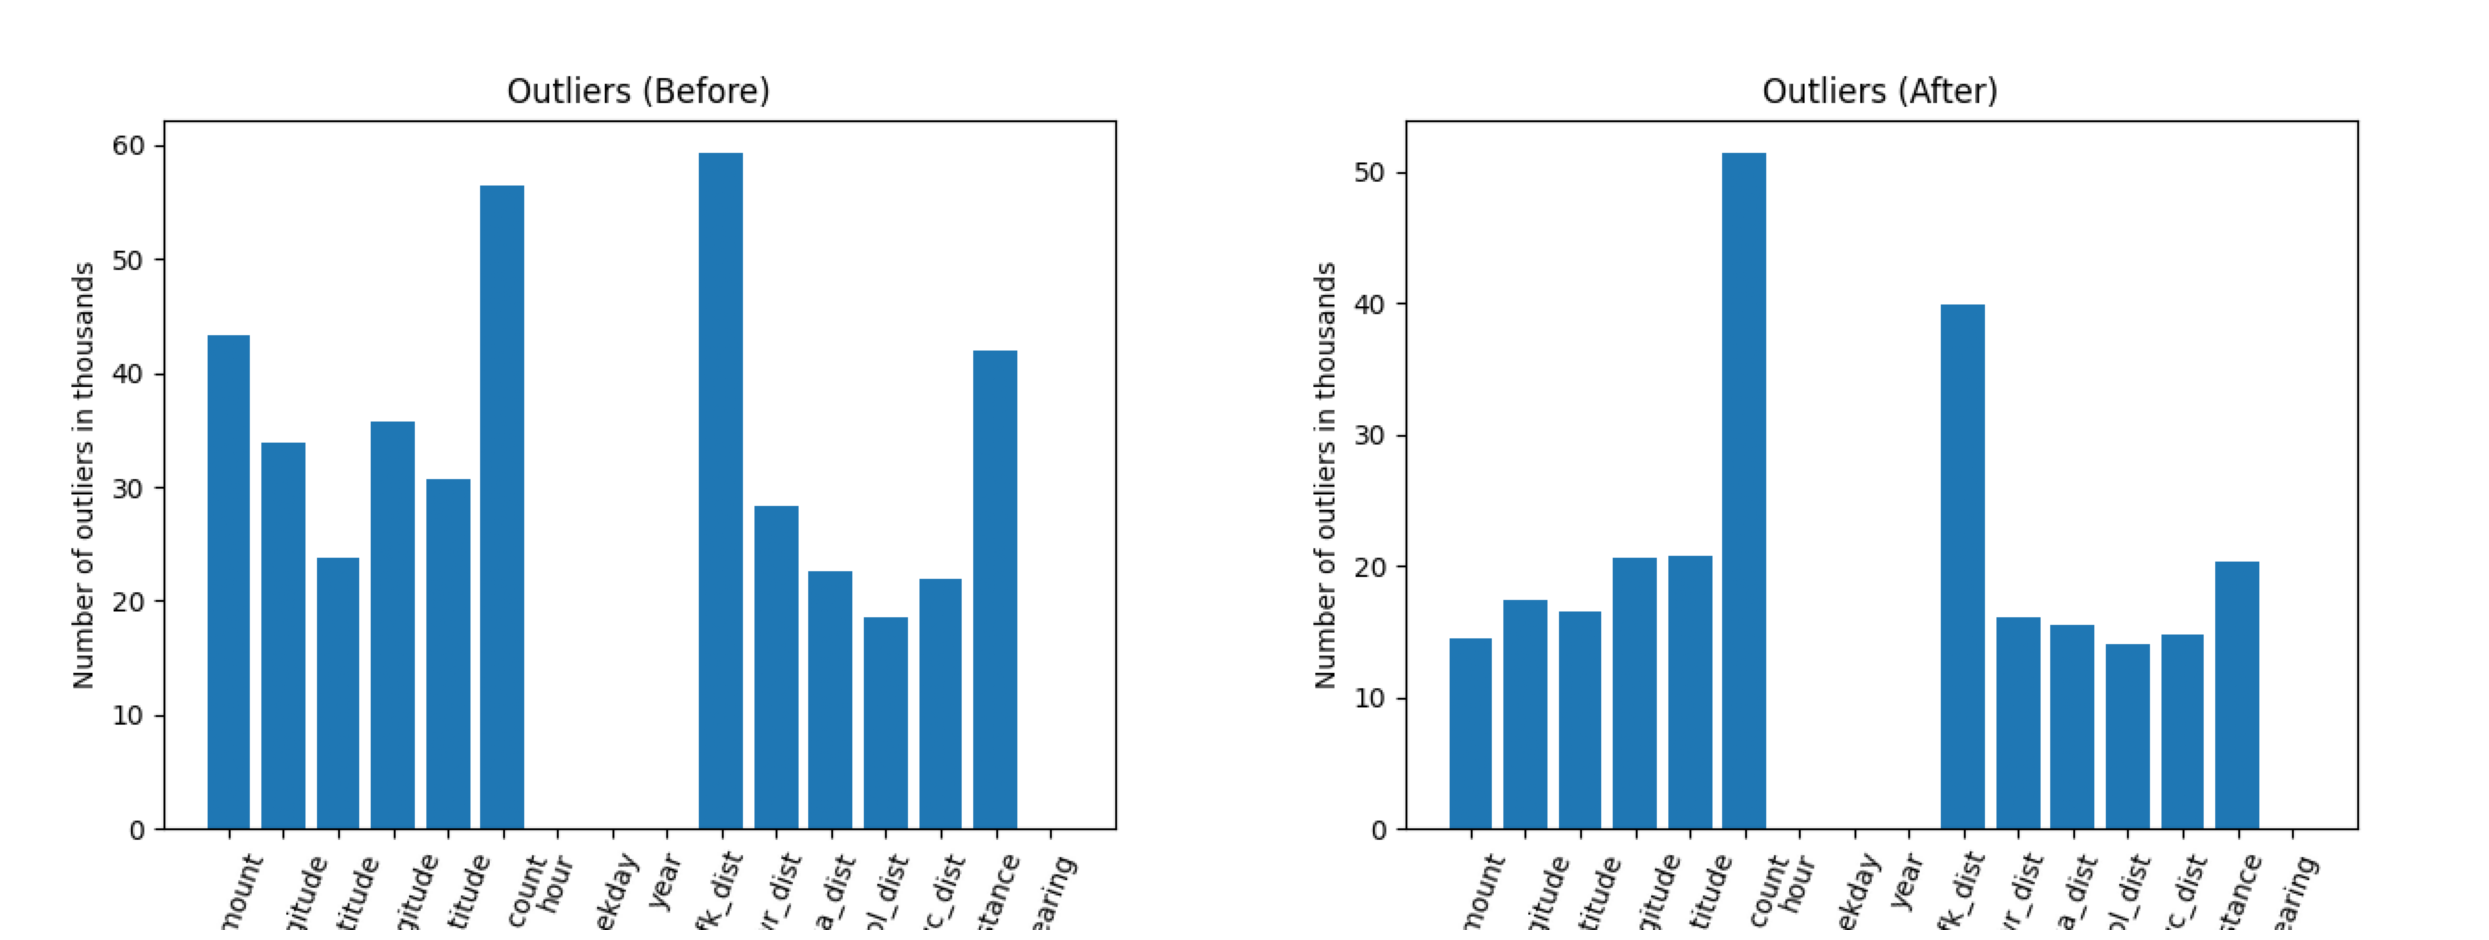

In [23]:
import matplotlib.image as mpimg

image1 = mpimg.imread('outliers_1.png')
image2 = mpimg.imread('outliers_2.png')

fig, axes = plt.subplots(1, 2, figsize=(25, 15))

axes[0].imshow(image1)
axes[0].axis('off')

axes[1].imshow(image2)
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [24]:
mydf = temp.select_dtypes(include='number')
z_scores = (mydf - np.mean(mydf, axis=0)) / np.std(mydf, axis=0)

In [25]:
threshold = 3

# Find the rows where any z-score exceeds the threshold (positive or negative)
z_outlier = np.abs(z_scores) > threshold 

# Get the indices of rows with outliers
outlier_indices = np.where(z_outlier.any(axis=1))[0]

# View the rows with outliers
outlier_data = temp.iloc[outlier_indices]
print(outlier_data.shape[0])

21457


In [26]:
z_outlier.sum()

fare_amount          3049
pickup_longitude     8829
pickup_latitude      8780
dropoff_longitude    8825
dropoff_latitude     8773
passenger_count      9490
hour                    0
weekday                 0
year                    0
jfk_dist             9122
ewr_dist             9122
lga_dist             9122
sol_dist             9122
nyc_dist             9122
distance              830
bearing                 0
dtype: int64

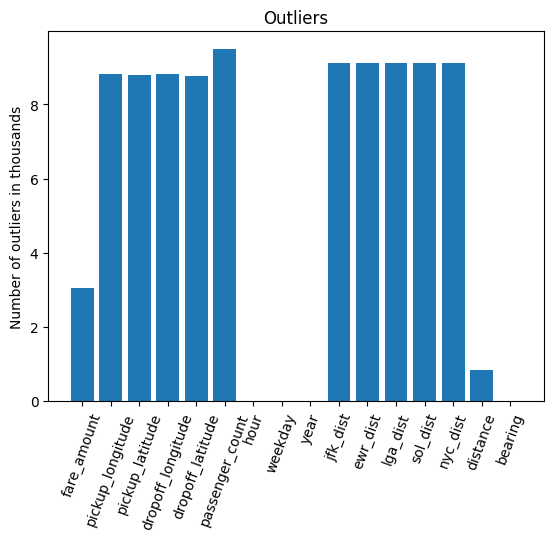

In [98]:
plt.bar(temp.select_dtypes(include='number').columns,np.array(z_outlier.sum())/1000)
plt.xticks(rotation=70)
plt.ylabel('Number of outliers in thousands')
plt.title('Outliers')
plt.show()

In [27]:
temp.reset_index(drop=True, inplace=True)
clean_df = temp.drop(index=outlier_indices)
clean_df

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,Very Good,windy,Congested Traffic,4.5,-1.288826,0.710721,-1.288779,0.710563,1,17,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,Excellent,cloudy,Flow Traffic,16.9,-1.291824,0.710546,-1.291182,0.711780,1,16,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,Bad,stormy,Congested Traffic,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,Very Good,stormy,Flow Traffic,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,Bad,stormy,Congested Traffic,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456663,Bad,rainy,Flow Traffic,19.5,-1.290649,0.711781,-1.289472,0.711010,1,2,0,2013,35.253546,45.766942,10.869932,27.883807,19.840035,7.507478,-2.283101
456664,Very Good,windy,Congested Traffic,13.0,-1.291337,0.711193,-1.291321,0.711028,5,22,5,2015,42.123722,32.557909,20.805410,15.446574,7.285943,1.055295,-3.067213
456665,Bad,rainy,Dense Traffic,7.0,-1.291173,0.711514,-1.290951,0.711371,1,18,3,2015,42.565403,36.580043,17.157511,20.401068,12.280187,1.404709,-2.275706
456666,Very Good,rainy,Flow Traffic,13.7,-1.291595,0.710670,-1.291708,0.710540,1,12,0,2010,41.814877,27.833416,26.463167,8.596656,0.994796,0.994184,2.556931


### Transformation for the Categorical Data

- Transformed `'Car Condition'`, `'Weather'`, `'Traffic Condition'` feature using `One-Hot Encoding`

In [79]:
data = pd.get_dummies(clean_df, columns=['Car Condition','Weather','Traffic Condition']).astype(float)
data.reset_index(drop=True, inplace=True)
data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,weekday,year,jfk_dist,...,Car Condition_Good,Car Condition_Very Good,Weather_cloudy,Weather_rainy,Weather_stormy,Weather_sunny,Weather_windy,Traffic Condition_Congested Traffic,Traffic Condition_Dense Traffic,Traffic Condition_Flow Traffic
0,4.5,-1.288826,0.710721,-1.288779,0.710563,1.0,17.0,0.0,2009.0,20.265840,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,16.9,-1.291824,0.710546,-1.291182,0.711780,1.0,16.0,1.0,2010.0,44.667679,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5.7,-1.291242,0.711418,-1.291391,0.711231,2.0,0.0,3.0,2011.0,43.597686,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,7.7,-1.291319,0.710927,-1.291396,0.711363,1.0,4.0,5.0,2012.0,42.642965,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.3,-1.290987,0.711536,-1.290787,0.711811,1.0,7.0,1.0,2010.0,43.329953,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435207,19.5,-1.290649,0.711781,-1.289472,0.711010,1.0,2.0,0.0,2013.0,35.253546,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
435208,13.0,-1.291337,0.711193,-1.291321,0.711028,5.0,22.0,5.0,2015.0,42.123722,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
435209,7.0,-1.291173,0.711514,-1.290951,0.711371,1.0,18.0,3.0,2015.0,42.565403,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
435210,13.7,-1.291595,0.710670,-1.291708,0.710540,1.0,12.0,0.0,2010.0,41.814877,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [80]:
data.iloc[:,9:].head()

,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,Car Condition_Bad,Car Condition_Excellent,Car Condition_Good,Car Condition_Very Good,Weather_cloudy,Weather_rainy,Weather_stormy,Weather_sunny,Weather_windy,Traffic Condition_Congested Traffic,Traffic Condition_Dense Traffic,Traffic Condition_Flow Traffic
0,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Select Best Features

In [35]:
from sklearn.feature_selection import SelectKBest, f_regression

X = data.drop(columns=['fare_amount'])

Y = data['fare_amount']
for i in range(1,19):
    # Assuming X is your features DataFrame and Y is the target variable
    selector = SelectKBest(score_func=f_regression, k=i)  # Select top 5 features
    X_new = selector.fit_transform(X, Y)

    # Get selected feature names
    selected_features = X.columns[selector.get_support()]
    print(f"Selected best {i} Features: {list(selected_features)}")

Selected best 1 Features: ['distance']
Selected best 2 Features: ['year', 'distance']
Selected best 3 Features: ['dropoff_latitude', 'year', 'distance']
Selected best 4 Features: ['pickup_latitude', 'dropoff_latitude', 'year', 'distance']
Selected best 5 Features: ['pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'year', 'distance']
Selected best 6 Features: ['pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'year', 'jfk_dist', 'distance']
Selected best 7 Features: ['pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'year', 'jfk_dist', 'lga_dist', 'distance']
Selected best 8 Features: ['pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'weekday', 'year', 'jfk_dist', 'lga_dist', 'distance']
Selected best 9 Features: ['pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'weekday', 'year', 'jfk_dist', 'lga_dist', 'sol_dist', 'distance']
Selected best 10 Features: ['pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'weekday', 'year', '

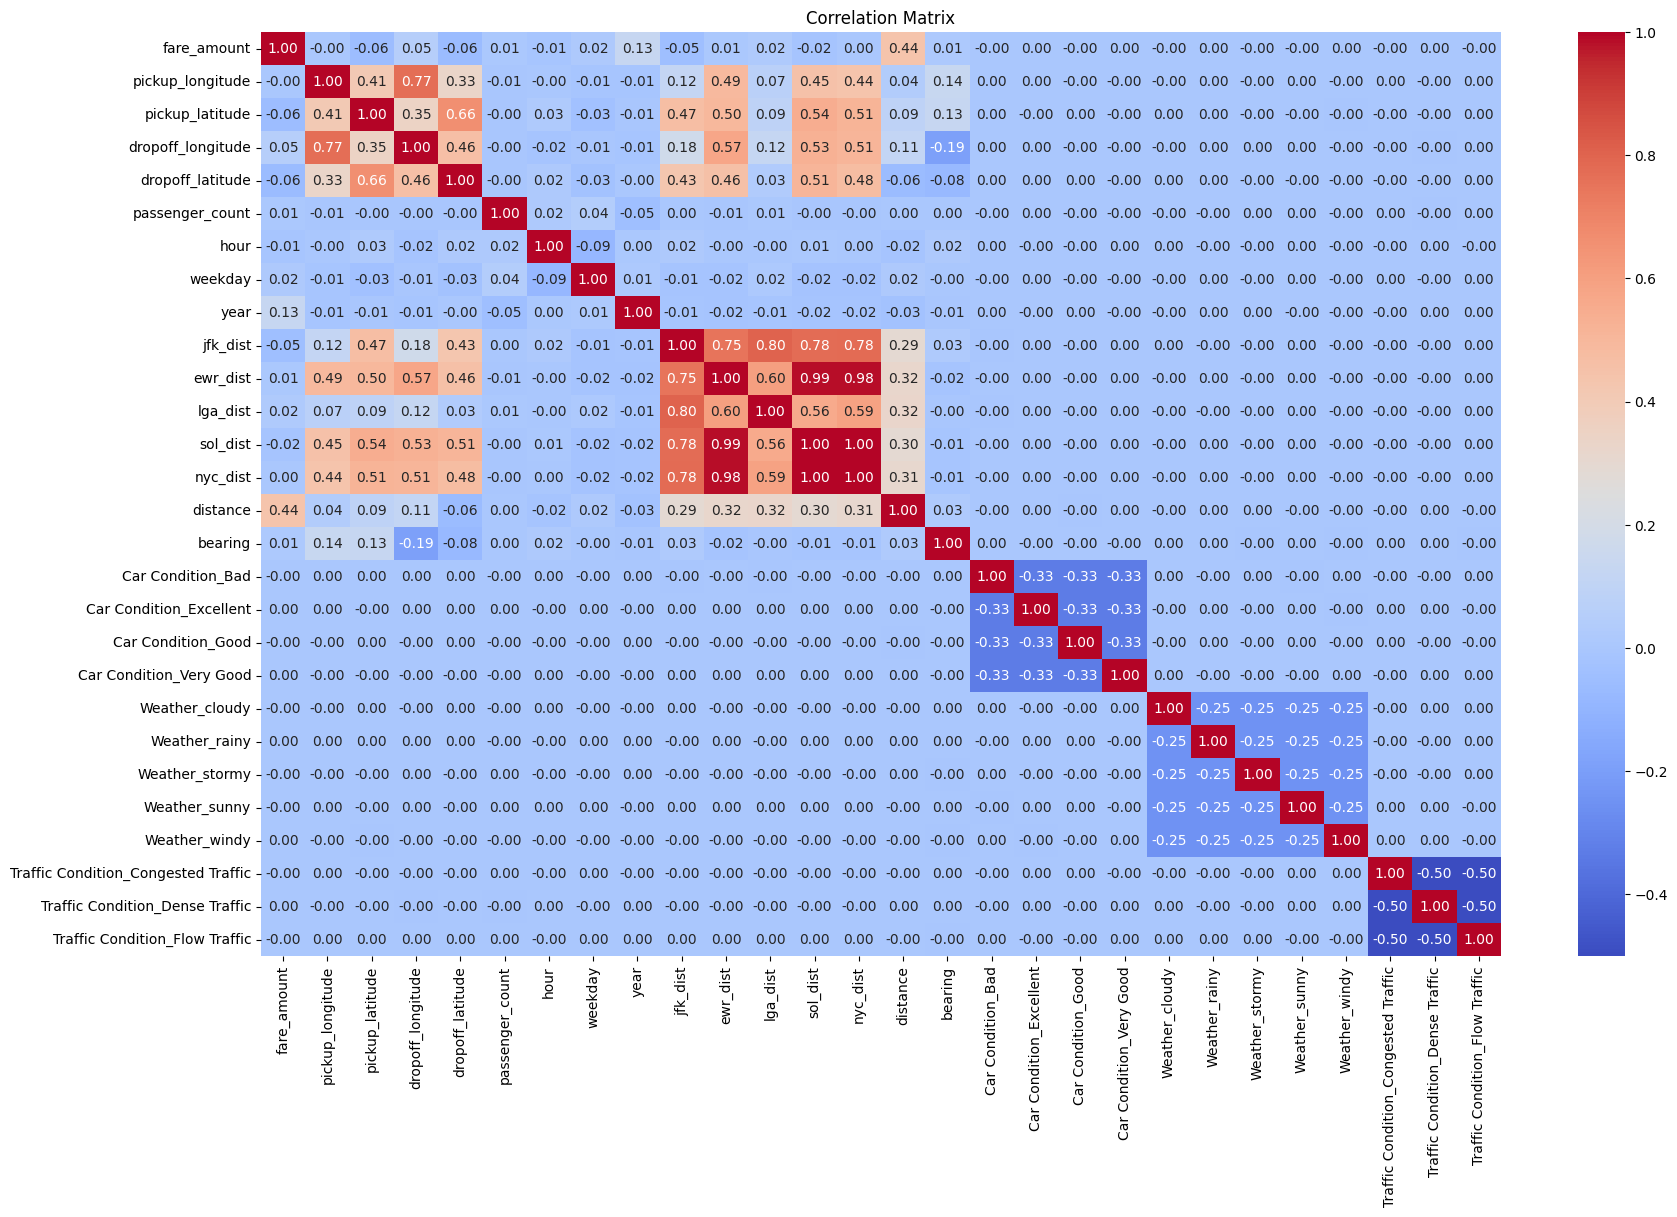

In [36]:
corr_mat = data.corr()
corr_mat
plt.figure(figsize=(20, 12))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Feature Engineering 

- Adding some features to make the model a little bit accurate

In [81]:
x = data[['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist','nyc_dist', 'distance', 'bearing', 'Car Condition_Bad',
       'Car Condition_Excellent', 'Car Condition_Good','Car Condition_Very Good', 'Weather_cloudy', 'Weather_rainy','Weather_stormy', 
       'Weather_sunny', 'Weather_windy','Traffic Condition_Congested Traffic','Traffic Condition_Dense Traffic', 'Traffic Condition_Flow Traffic']]

In [82]:
x = data.drop(columns=['fare_amount'])
# x = data.drop(columns=['fare_amount','pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude'])
# x = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'bearing', 'Car Condition_Bad', 'Weather_windy', 'Traffic Condition_Congested Traffic', 'Traffic Condition_Dense Traffic']]
# x = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'bearing', 'Traffic Condition_Dense Traffic']]
y = data['fare_amount']
x.shape

(435212, 27)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
def accuracy(y_train, y_test, y_pred, train_pred):
    mse_train = mean_squared_error(y_train, train_pred)
    print(f'Mean Squared Error of the model on train data = {mse_train:.3f}')

    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error of the model on test data = {mse:.3f}\n')

    mae_train = mean_absolute_error(y_train, train_pred)
    print(f'Mean Absolute Error of the model on train data = {mae_train:.3f}')

    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error of the model on test data = {mae:.3f}\n')

    r2_train = r2_score(y_train, train_pred)
    print(f'R-squared of the model on train data = {r2_train:.3f}')

    r2 = r2_score(y_test, y_pred)
    print(f'R-squared of the model on test data = {r2:.3f}')

### Spliting the data to train data and test data

In [83]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=42)

### `Linear Regression Model`

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

### Training the model

In [42]:
model.fit(x_train,y_train)

LinearRegression()

### Making predictions on the test data

In [43]:
y_pred = model.predict(x_test)

In [44]:
train_pred = model.predict(x_train)

### Measuring the accurecy of the model `(How well the model perform with a new unseen dataset)`

#### We are going to use some metrics to measure performance `(Error cost metrics)`


- Mean Squared Error (MSE) metric

- The equation for this metric is:
$$MSE = \frac{1}{n} \sum\limits_{i = 0}^{n-1} (y_{i} - f(x_{i}))^2 \tag{1}$$

- Mean Absolute Error (MAE) metric

- The equation for this metric is:
$$MAE = \frac{1}{n} \sum\limits_{i = 0}^{n-1} |y_{i} - f(x_{i})| \tag{1}$$

- R-squared (R²), also known as the coefficient of determination
- The equations for this metric is:

$$
R^{2} = 1 - \frac{SS_{residuals}}{SS_{total}} \\
\; \\    

where \;\;\;SS_{residuals} = \sum\limits_{i = 0}^{n-1} (y_{i} - f(x_{i}))^2\;,\;\; 

SS_{total} = \sum\limits_{i = 0}^{n-1} (y_{i} - \bar{y})^2
$$

In [45]:
accuracy(y_train,y_test,y_pred,train_pred)

Mean Squared Error of the model on train data = 11.792
Mean Squared Error of the model on test data = 10.924

Mean Absolute Error of the model on train data = 2.479
Mean Absolute Error of the model on test data = 2.475

R-squared of the model on train data = 0.268
R-squared of the model on test data = 0.321


In [84]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=True)),
    ('linear_regression', LinearRegression())
])

# Train the model
poly_model.fit(x_train, y_train)

# Make predictions
y_pred_poly = poly_model.predict(x_test)
train_pred = poly_model.predict(x_train)

accuracy(y_train,y_test,y_pred_poly,train_pred)

Mean Squared Error of the model on train data = 4.627
Mean Squared Error of the model on test data = 5.465

Mean Absolute Error of the model on train data = 1.480
Mean Absolute Error of the model on test data = 1.493

R-squared of the model on train data = 0.713
R-squared of the model on test data = 0.660


### `XGBoost Model`

In [48]:
from xgboost import XGBRegressor 
xmodel = XGBRegressor(n_estimators=400, learning_rate=0.05, max_depth=10, random_state=42)

In [49]:
xmodel.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [50]:
y_pred = xmodel.predict(x_test)

In [51]:
train_pred = xmodel.predict(x_train)

In [52]:
accuracy(y_train,y_test,y_pred,train_pred)

Mean Squared Error of the model on train data = 1.883
Mean Squared Error of the model on test data = 3.175

Mean Absolute Error of the model on train data = 0.929
Mean Absolute Error of the model on test data = 1.156

R-squared of the model on train data = 0.883
R-squared of the model on test data = 0.803


In [85]:
poly_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=True)),
    ('linear_regression', XGBRegressor())
])

# Train the model
poly_model.fit(x_train, y_train)

# Make predictions
y_pred_poly = poly_model.predict(x_test)
train_pred = poly_model.predict(x_train)

accuracy(y_train,y_test,y_pred_poly,train_pred)

Mean Squared Error of the model on train data = 2.818
Mean Squared Error of the model on test data = 3.308

Mean Absolute Error of the model on train data = 1.128
Mean Absolute Error of the model on test data = 1.195

R-squared of the model on train data = 0.825
R-squared of the model on test data = 0.794


### `Neural Network Model`

In [86]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Sequential

In [87]:
tf.random.set_seed(1234) # for consistent results
Nmodel = Sequential(
    [               
        Input(shape=(27,)),
        Dense(64, activation="relu", name="L1"),
        Dense(32, activation="relu", name="L2"),
        Dense(1, activation="linear", name="L3")
    ], name = "my_model" 
)

In [88]:
Nmodel.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['r2_score']
)

In [89]:
Nmodel.fit(x_train,y_train,epochs=10)

Epoch 1/10
10881/10881 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 125.9919 - r2_score: -6.8012
Epoch 2/10
10881/10881 ━━━━━━━━━━━━━━━━━━━━ 11s 962us/step - loss: 7.1890 - r2_score: 0.5546
Epoch 3/10
10881/10881 ━━━━━━━━━━━━━━━━━━━━ 11s 968us/step - loss: 5.7992 - r2_score: 0.6407
Epoch 4/10
10881/10881 ━━━━━━━━━━━━━━━━━━━━ 10s 915us/step - loss: 5.7421 - r2_score: 0.6443
Epoch 5/10
10881/10881 ━━━━━━━━━━━━━━━━━━━━ 10s 906us/step - loss: 5.6605 - r2_score: 0.6493
Epoch 6/10
10881/10881 ━━━━━━━━━━━━━━━━━━━━ 10s 887us/step - loss: 5.6134 - r2_score: 0.6523
Epoch 7/10
10881/10881 ━━━━━━━━━━━━━━━━━━━━ 10s 935us/step - loss: 5.5953 - r2_score: 0.6534
Epoch 8/10
10881/10881 ━━━━━━━━━━━━━━━━━━━━ 11s 972us/step - loss: 5.5892 - r2_score: 0.6538
Epoch 9/10
10881/10881 ━━━━━━━━━━━━━━━━━━━━ 11s 979us/step - loss: 5.5857 - r2_score: 0.6540
Epoch 10/10
10881/10881 ━━━━━━━━━━━━━━━━━━━━ 10s 931us/step - loss: 5.5851 - r2_score: 0.6540


In [90]:
y_pred2 = Nmodel.predict(x_test)

2721/2721 ━━━━━━━━━━━━━━━━━━━━ 2s 695us/step


In [91]:
train_pred = Nmodel.predict(x_train)

10881/10881 ━━━━━━━━━━━━━━━━━━━━ 8s 772us/step


In [92]:
accuracy(y_train,y_test,y_pred2,train_pred)

Mean Squared Error of the model on train data = 6.410
Mean Squared Error of the model on test data = 6.488

Mean Absolute Error of the model on train data = 1.752
Mean Absolute Error of the model on test data = 1.757

R-squared of the model on train data = 0.602
R-squared of the model on test data = 0.597


### Hyper parameter tuning using `RandomizedSearch`

In [93]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 8 , 10, 12],
    'min_samples_split': [4, 6, 8]
}

final_model = XGBRegressor()

In [94]:
random_search = RandomizedSearchCV(estimator=final_model, param_distributions=param_grid, n_iter=5, cv=5, scoring='r2', random_state=42)

In [95]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=5,
                   param_distributions={'max_depth': [4, 8, 10, 12],
                                        'min_samples_split': [4, 6, 8],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='r2')

In [96]:
print("Best parameters:", random_search.best_params_)
print("Best accuracy:", random_search.best_score_)

Best parameters: {'n_estimators': 200, 'min_samples_split': 6, 'max_depth': 8}
Best accuracy: 0.7960356019546133


In [97]:
r2_train = r2_score(y_train, random_search.predict(x_train))
print(f'R-squared of the model on train data = {r2_train:.3f}')

r2 = r2_score(y_test, random_search.predict(x_test))
print(f'R-squared of the model on test data = {r2:.3f}')

R-squared of the model on train data = 0.875
R-squared of the model on test data = 0.794


In [46]:
data = pd.get_dummies(df, columns=['Car Condition','Weather','Traffic Condition']).astype(float)
data.reset_index(drop=True, inplace=True)
data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,weekday,year,jfk_dist,...,Car Condition_Good,Car Condition_Very Good,Weather_cloudy,Weather_rainy,Weather_stormy,Weather_sunny,Weather_windy,Traffic Condition_Congested Traffic,Traffic Condition_Dense Traffic,Traffic Condition_Flow Traffic
0,4.5,-1.288826,0.710721,-1.288779,0.710563,1.0,17.0,0.0,2009.0,20.265840,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,16.9,-1.291824,0.710546,-1.291182,0.711780,1.0,16.0,1.0,2010.0,44.667679,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5.7,-1.291242,0.711418,-1.291391,0.711231,2.0,0.0,3.0,2011.0,43.597686,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,7.7,-1.291319,0.710927,-1.291396,0.711363,1.0,4.0,5.0,2012.0,42.642965,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.3,-1.290987,0.711536,-1.290787,0.711811,1.0,7.0,1.0,2010.0,43.329953,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,7.0,-1.291173,0.711514,-1.290951,0.711371,1.0,18.0,3.0,2015.0,42.565403,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
499996,13.7,-1.291595,0.710670,-1.291708,0.710540,1.0,12.0,0.0,2010.0,41.814877,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
499997,25.0,-1.291262,0.710796,-1.289737,0.710366,1.0,0.0,0.0,2014.0,31.780108,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
499998,6.5,-1.291101,0.711335,-1.291023,0.711480,6.0,12.0,0.0,2015.0,42.292914,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [63]:
x = data.drop(columns=['fare_amount'])
y = data['fare_amount']
x.shape

(500000, 27)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [66]:
xmodel = XGBRegressor(n_estimators=400, learning_rate=0.05, max_depth=10, random_state=42)

In [67]:
xmodel.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [68]:
y_pred = xmodel.predict(x_test)

In [69]:
train_pred = xmodel.predict(x_train)

In [70]:
accuracy(y_train,y_test,y_pred,train_pred)

Mean Squared Error of the model on train data = 7.164
Mean Squared Error of the model on test data = 20.160

Mean Absolute Error of the model on train data = 1.388
Mean Absolute Error of the model on test data = 1.782

R-squared of the model on train data = 0.927
R-squared of the model on test data = 0.793


In [71]:
model = LinearRegression()

In [72]:
model.fit(x_train,y_train)

LinearRegression()

In [73]:
y_pred = model.predict(x_test)

In [74]:
train_pred = model.predict(x_train)

In [75]:
accuracy(y_train,y_test,y_pred,train_pred)

Mean Squared Error of the model on train data = 64.400
Mean Squared Error of the model on test data = 68.297

Mean Absolute Error of the model on train data = 4.902
Mean Absolute Error of the model on test data = 4.915

R-squared of the model on train data = 0.347
R-squared of the model on test data = 0.297
